In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scalp_utils_fif import *
import joblib
import os
from IPython.display import clear_output
from scipy import stats
import xgboost

In [3]:
# set the path to the folder containing the data. folder should contain two subfolders: HC and EPI
folder = r"D:\EPI_MFF\REM_EOG"
egi_nrem_path_HC = folder +"\HC\%s.fif"
egi_nrem_path_EPI = folder +"\EPI\%s.fif"
subjects_HC = [os.path.splitext(x)[0] for x in os.listdir(folder +"\HC")]
subjects_EPI = [os.path.splitext(x)[0] for x in os.listdir(folder +"\EPI")]

subjects_EPI

['AO0', 'DH3', 'MF7', 'MM1', 'TA1', 'YS5']

In [4]:
# load all models
rf_model = joblib.load('rf_under_19.pkl')
rf_model_Balanced = joblib.load('rf_full_balanced_19.pkl')
rf_model_1_10 = joblib.load('rf_full_1_10_ratio_19.pkl')
lgbm_model = joblib.load('lgbm_under_19.pkl')
lgbm_model_Balanced = joblib.load('lgbm_full_balanced_19.pkl')
lgbm_model_1_10 = joblib.load('lgbm_full_1_10_ratio_19.pkl')
lgbm_model_origin = joblib.load('lgbm_full_origin_19.pkl')
xgb = joblib.load('xgb_full_origin_19.pkl')
xgb_Balanced = joblib.load('xgb_full_balanced_19.pkl')
xgb_1_10 = joblib.load('xgb_full_1_10_ratio_19.pkl')
lgbm_model_origin_70 = joblib.load('lgbm_full_origin_70_19.pkl')
lgbm_origin_symmetric = joblib.load('lgbm_full_origin_symmetric_19.pkl')
xgb_origin_Balanced_70 = joblib.load('xgb_full_balanced_70_19.pkl')
xgb_model_1_10_70 = joblib.load('xgb_full_1_10_ratio_70_19.pkl')
xgb_model_1_10_fixed = joblib.load('xgb_full_1_10_ratio_19_fix_prob.pkl')
xgb_model_fixed = joblib.load('xgb_full_origin_19_fix_prob.pkl')
xgb__balanced_symmetric = joblib.load('xgb_full_balanced_symmetric_19.pkl')
xgb_symmetric = joblib.load('xgb_full_origin_symmetric_19.pkl')




C:\Users\mad17\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\mad17\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\mad17\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.0.2 when using version 1.2.2. T

In [10]:
# Choose the model amd electrodes to use
model = lgbm_origin_symmetric
el1 = 'E251'
el2 = 'E227'
# predict proba for all subjects, each subject is saved in a variable with his id


model_name = str(model)[:str(model).find('(')]
eog1_dict = {}
eog2_dict = {}
for subj in subjects_HC:
    feat_eog1 = get_all_feat_eog_with_chan_feat(el1, subjects=[subj], path=egi_nrem_path_HC)
    clear_output()
    eog1_dict[subj] = feat_eog1
    feat_eog2 = get_all_feat_eog_with_chan_feat(el2, subjects=[subj], path=egi_nrem_path_HC)
    clear_output()
    eog2_dict[subj] = feat_eog2
    # E1-LM
   

joblib.dump(eog1_dict, f'eog1_egi.pkl')
joblib.dump(eog2_dict, f'eog2_egi.pkl')
eog1_dict = joblib.load('eog1_egi.pkl')
eog2_dict = joblib.load('eog2_egi.pkl')
feat_all = pd.DataFrame()
for subj in subjects_HC:
    curr_feat = pd.concat([eog1_dict[subj].iloc[:, 2:], eog2_dict[subj].iloc[:, 2:].add_suffix('_2')], axis=1)
    
    for classifier in [model]:
        # save classifier.predict_proba(curr_feat) in variable with name subj
        vars()[subj] = classifier.predict_proba(curr_feat)
        vars()[subj+'_pred'] = classifier.predict(curr_feat)
        
        print(subj)
eog1_dict = {}
eog2_dict = {}
for subj in subjects_EPI:
    feat_eog1 = get_all_feat_eog_with_chan_feat(el1, subjects=[subj], path=egi_nrem_path_EPI)
    clear_output()
    eog1_dict[subj] = feat_eog1
    feat_eog2 = get_all_feat_eog_with_chan_feat(el2, subjects=[subj], path=egi_nrem_path_EPI)
    clear_output()
    eog2_dict[subj] = feat_eog2

joblib.dump(eog1_dict, f'eog1_egi.pkl')
joblib.dump(eog2_dict, f'eog2_egi.pkl')
eog1_dict = joblib.load('eog1_egi.pkl')
eog2_dict = joblib.load('eog2_egi.pkl')
feat_all = pd.DataFrame()
for subj in subjects_EPI:
    curr_feat = pd.concat([eog1_dict[subj].iloc[:, 2:], eog2_dict[subj].iloc[:, 2:].add_suffix('_2')], axis=1)
    
    for classifier in [model]:
        # save classifier.predict_proba(curr_feat) in variable with name subj
        vars()[subj] = classifier.predict_proba(curr_feat)
        vars()[subj+'_pred'] = classifier.predict(curr_feat)
        
        print(subj)

AO0
DH3
MF7
MM1
TA1
YS5


C:\Users\mad17\AppData\Local\Temp\ipykernel_5388\2294525260.py:8: RuntimeWarning: This filename (C:\Users\mad17\Desktop\VE\MFF\AO0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  sample_raw = mne.io.read_raw_fif(r"C:\Users\mad17\Desktop\VE\MFF\AO0.fif", preload=False, verbose=False)


<Figure size 200x200 with 0 Axes>

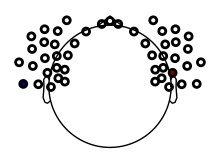

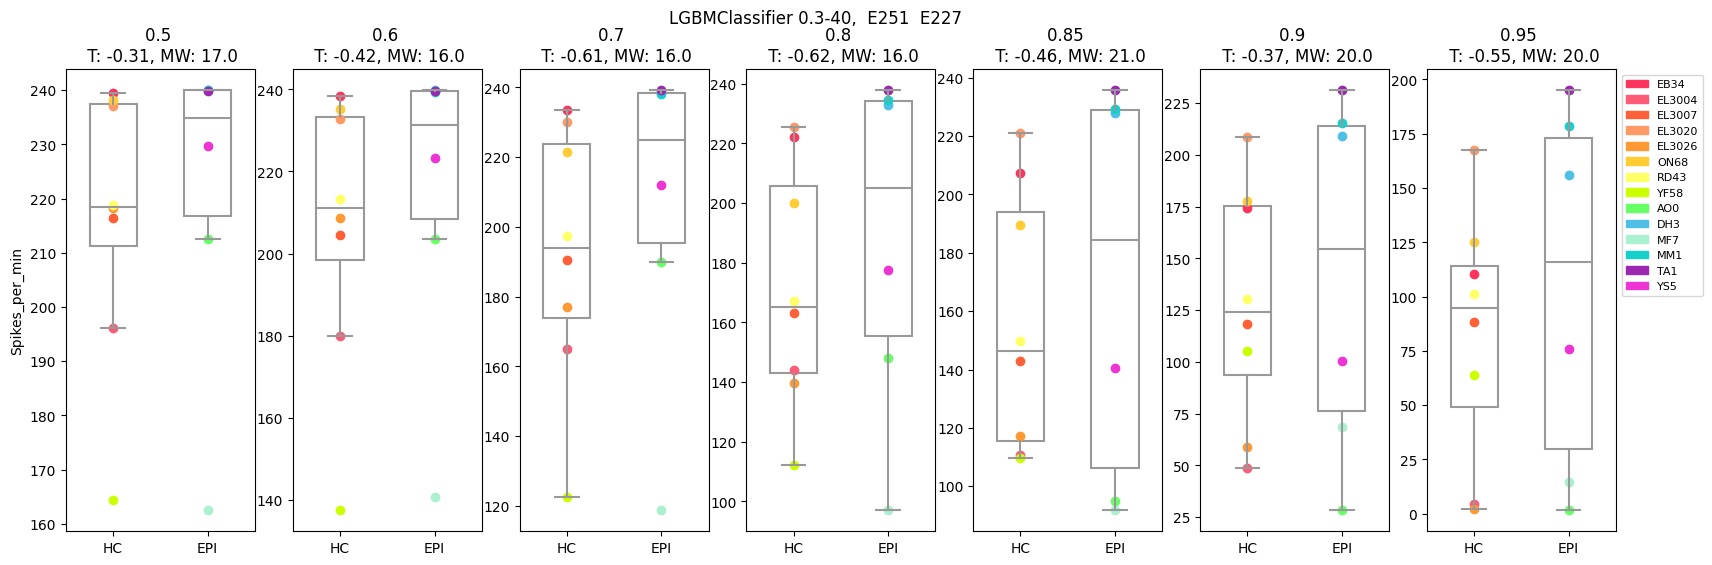

In [12]:
# Plot the results
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
from scipy.stats import ttest_ind, mannwhitneyu
sample_raw = mne.io.read_raw_fif(r"C:\Users\mad17\Desktop\VE\MFF\AO0.fif", preload=False, verbose=False)
plt.rcParams['figure.figsize'] = [2, 2]
sensors = plt.figure()
sample_raw.plot_sensors(ch_type="eeg" ,ch_groups=[[sample_raw.info['ch_names'].index(el1)],[sample_raw.info['ch_names'].index(el2)]])
tests = pd.DataFrame(columns=['threshols', 't-test', 'p-value', 'mann-whitney', 'p-value'])
colors = ['#ff355e', '#fd5b78', '#ff6037', '#ff9966', '#ff9933', '#ffcc33', '#ffff66', '#ccff00', '#66ff66', '#50bfe6', '#aaf0d1', '#16d0cb', '#9c27b0', '#ee34d2', '#ff00cc']	
fig, axs = plt.subplots(1, 7, figsize=(20, 6))
for i, threshold in enumerate([0.5,0.6, 0.7, 0.8, 0.85, 0.9, 0.95]):
    df = pd.DataFrame(columns=['subject', 'Spikes_per_min', 'group'])
    # Check threshold for each subject, if prediction is above threshold, it is considered as spike
    for subj in subjects_HC:
        vars()[subj + 'Tr'] = [0 if i < threshold else 1 for i in vars()[subj][:, 0]]
        
    for subj in subjects_EPI:
        vars()[subj + 'Tr'] = [0 if i < threshold else 1 for i in vars()[subj][:, 0]]
    #Sum all spikes for each subject and divide by the number of minutes in the recording to get spikes per minute
    for subj in subjects_HC:
        
        vars()[subj + 'Tr'] = np.sum(vars()[subj+ 'Tr'])/(len(vars()[subj+ 'Tr'])/240)
    for subj in subjects_EPI:
        vars()[subj + 'Tr'] = np.sum(vars()[subj+ 'Tr'])/(len(vars()[subj+ 'Tr'])/240)


    # create df 
    df = pd.DataFrame(columns=['subject', 'Spikes_per_min', 'group'])

     
    for subj in subjects_HC:
        df.loc[len(df)] = [subj, vars()[subj+ 'Tr'], 'HC']
    for subj in subjects_EPI:
        df.loc[len(df)] = [subj, vars()[subj+ 'Tr'], 'EPI']
    # perform t test, mann whitney u test between EPI and HC
    tests.loc[len(tests)] = [threshold, ttest_ind(df[df.group == 'HC'].Spikes_per_min, df[df.group == 'EPI'].Spikes_per_min)[0], ttest_ind(df[df.group == 'HC'].Spikes_per_min, df[df.group == 'EPI'].Spikes_per_min)[1], mannwhitneyu(df[df.group == 'HC'].Spikes_per_min, df[df.group == 'EPI'].Spikes_per_min)[0], mannwhitneyu(df[df.group == 'HC'].Spikes_per_min, df[df.group == 'EPI'].Spikes_per_min)[1]]
    # add colors to df
    df['color'] = colors
    
   
    

    sns.boxplot(x='group', y='Spikes_per_min', data=df, ax=axs[i],color='white', width=0.5, fliersize=0)
    for j, subj in enumerate(subjects_HC):
        axs[i].scatter(0, vars()[subj+ 'Tr'], color=df[df.subject == subj].color.values[0])
        
    
    # set title for each subplot with t-test and mann whitney u test
    axs[i].set_title(f'{threshold} \n T: {round(tests[tests.threshols == threshold].iloc[0, 1], 2)}, MW: {round(tests[tests.threshols == threshold].iloc[0, 3], 2)}')
    
     
#   cycle for EPI subjects to add dot for each subject with different color from colors list
    for j, subj in enumerate(subjects_EPI):
        axs[i].scatter(1, vars()[subj+ 'Tr'], color=df[df.subject == subj].color.values[0])
        # add legend with colors and subject names
        
#   legend with colors and subject names according to df[colors]
    legend_elements = [mpatches.Patch(color=df[df.subject == subj].color.values[0], label=subj) for subj in subjects_HC] + [mpatches.Patch(color=df[df.subject == subj].color.values[0], label=subj) for subj in subjects_EPI]
    
    # show it 1 time
    if i == 0:
            axs[i].legend(handles=legend_elements, bbox_to_anchor = (8.69, 1), fontsize=8)
    

    # set 1 title for the whole figure with model name, threshold range, and el1, el2 names
    fig.suptitle(f'{model_name} 0.3-40,  {el1}  {el2}')
    

for ax in axs:
    ax.set(xlabel='')

for ax in axs[1:]:
    ax.set(ylabel='')



# # save figure
# plt.savefig('LGBM.03_E2.png')


plt.show()



Check all combination of sensors by performing t-test abd MW test ot them. 

In [16]:
# Approx takes 24 hours to run with 47 sensors*
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
# pick on of the files to get sensors list
sensors_raw = mne.io.read_raw_fif(r"D:\EPI_MFF\NREM_EOG_DB\HC\EB34.fif", preload=False, verbose=False)
sensors_raw.info['ch_names']
tests_m = pd.DataFrame(columns=['sensor1','sensor2','threshold', 't-test', 'T_p-value', 'mann-whitney', 'MU_p-value'])
# choose model
model = lgbm_origin_symmetric 

sensors = sensors_raw.info['ch_names']
# cycle through all combination of 2 sensors with printing all combinations
for i in range(len(sensors)):
    for j in range(i+1, len(sensors)):
        print(sensors[i], sensors[j])
       
        eog1_dict = {}
        eog2_dict = {}
        for subj in subjects_HC:
            feat_eog1 = get_all_feat_eog_with_chan_feat(sensors[i], subjects=[subj], path=egi_nrem_path_HC)
            clear_output()
            eog1_dict[subj] = feat_eog1
            feat_eog2 = get_all_feat_eog_with_chan_feat(sensors[j], subjects=[subj], path=egi_nrem_path_HC)
            clear_output()
            eog2_dict[subj] = feat_eog2


        joblib.dump(eog1_dict, f'eog1_egi.pkl')
        joblib.dump(eog2_dict, f'eog2_egi.pkl')
        eog1_dict = joblib.load('eog1_egi.pkl')
        eog2_dict = joblib.load('eog2_egi.pkl')
        feat_all = pd.DataFrame()
        for subj in subjects_HC:
            curr_feat = pd.concat([eog1_dict[subj].iloc[:, 2:], eog2_dict[subj].iloc[:, 2:].add_suffix('_2')], axis=1)
            
            for classifier in [model]:
                
                vars()[subj] = classifier.predict_proba(curr_feat)
              
                print(subj)
        eog1_dict = {}
        eog2_dict = {}
        for subj in subjects_EPI:
            feat_eog1 = get_all_feat_eog_with_chan_feat(sensors[i], subjects=[subj], path=egi_nrem_path_EPI)
            clear_output()
            eog1_dict[subj] = feat_eog1
            feat_eog2 = get_all_feat_eog_with_chan_feat(sensors[j], subjects=[subj], path=egi_nrem_path_EPI)
            clear_output()
            eog2_dict[subj] = feat_eog2

        joblib.dump(eog1_dict, f'eog1_egi.pkl')
        joblib.dump(eog2_dict, f'eog2_egi.pkl')
        eog1_dict = joblib.load('eog1_egi.pkl')
        eog2_dict = joblib.load('eog2_egi.pkl')
        feat_all = pd.DataFrame()
        for subj in subjects_EPI:
            curr_feat = pd.concat([eog1_dict[subj].iloc[:, 2:], eog2_dict[subj].iloc[:, 2:].add_suffix('_2')], axis=1)
            
            for classifier in [model]:
          
               
                print(subj)




        for q, threshold in enumerate([0.5,0.6, 0.7, 0.8, 0.85, 0.9, 0.95]):
            df = pd.DataFrame(columns=['subject', 'Spikes_per_min', 'group'])
            for subj in subjects_HC:
                vars()[subj + 'Tr'] = [0 if q < threshold else 1 for q in vars()[subj][:, 0]]
                
            for subj in subjects_EPI:
                vars()[subj + 'Tr'] = [0 if q < threshold else 1 for q in vars()[subj][:, 0]]

            for subj in subjects_HC:
                
                vars()[subj + 'Tr'] = np.sum(vars()[subj+ 'Tr'])/(len(vars()[subj+ 'Tr'])/240)
            for subj in subjects_EPI:
                vars()[subj + 'Tr'] = np.sum(vars()[subj+ 'Tr'])/(len(vars()[subj+ 'Tr'])/240)


            # create df 
            df = pd.DataFrame(columns=['subject', 'Spikes_per_min', 'group'])

          
            for subj in subjects_HC:
                df.loc[len(df)] = [subj, vars()[subj+ 'Tr'], 'HC 8 ']
            for subj in subjects_EPI:
                df.loc[len(df)] = [subj, vars()[subj+ 'Tr'], 'EPI 7']
            # perform t test, mann whitney u test between the two groups in df dataframe and add resuts and p-values to tests dataframe in the existing columns
            tests_m.loc[len(tests_m)] = [sensors[i],sensors[j], threshold, ttest_ind(df[df.group == 'HC 8 '].Spikes_per_min, df[df.group == 'EPI 7'].Spikes_per_min)[0], ttest_ind(df[df.group == 'HC 8 '].Spikes_per_min, df[df.group == 'EPI 7'].Spikes_per_min)[1], mannwhitneyu(df[df.group == 'HC 8 '].Spikes_per_min, df[df.group == 'EPI 7'].Spikes_per_min)[0], mannwhitneyu(df[df.group == 'HC 8 '].Spikes_per_min, df[df.group == 'EPI 7'].Spikes_per_min)[1]]
            print(sensors[i],sensors[j])
#Save tests dataframe to csv 
tests_m.to_csv('tests_m_LGBM_REM.csv')        

AO0
DH3
MF7
MM1
TA1
YS5
E254 E255
E254 E255
E254 E255
E254 E255
E254 E255
E254 E255
E254 E255
